In [1]:
%pip install wbdata
%pip install geodatasets
import geodatasets
import wbdata
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from geodatasets import get_path

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


Key '-8314450439076612682' not in persistent cache.
Key '6442002378679169108' not in persistent cache.
Key '6605333860545966378' not in persistent cache.
Key '-8576578111165026932' not in persistent cache.
Key '-3210492770107865604' not in persistent cache.
Key '-5643062390015587821' not in persistent cache.
Key '-3635951924063077124' not in persistent cache.
Key '8661489767321482488' not in persistent cache.
Key '-793342133596166706' not in persistent cache.
Key '-5920751316897403659' not in persistent cache.
Key '-4857778096614388288' not in persistent cache.
Key '-9001898067049430453' not in persistent cache.
Key '-8384737870701360844' not in persistent cache.
Key '-2303424498181903440' not in persistent cache.
Key '-6670175478216647117' not in persistent cache.
Key '-2640218762034635766' not in persistent cache.
Key '-3151105963668762848' not in persistent cache.
Key '7134250933400893596' not in persistent cache.
Key '-4103132369807003925' not in persistent cache.
Key '-77934236257

In [2]:
SOURCE = 40 # "Population estimates and projections
indicators = wbdata.get_indicators(source=SOURCE)

In [4]:
variable_labels = {"SM.POP.NETM":"Net Migration"}
country_mapping = {"AUS": "Australia", "FJI": "Fiji", "MYS": "Malaysia", "SLB":"Solomon Islands"}
df = wbdata.get_dataframe(variable_labels, country=list(country_mapping.keys()), parse_dates=True)
df = df.reset_index()
df["ISO_A3"] = df["country"].map({v: k for k, v in country_mapping.items()})
df

,country,date,Net Migration,ISO_A3
0,Australia,2023-01-01,140232.0,AUS
1,Australia,2022-01-01,140972.0,AUS
2,Australia,2021-01-01,116768.0,AUS
3,Australia,2020-01-01,44447.0,AUS
4,Australia,2019-01-01,207142.0,AUS
...,...,...,...,...
251,Solomon Islands,1964-01-01,-1200.0,SLB
252,Solomon Islands,1963-01-01,-1129.0,SLB
253,Solomon Islands,1962-01-01,-1073.0,SLB
254,Solomon Islands,1961-01-01,-1016.0,SLB


In [6]:
countries = [c['id'] for c in wbdata.get_countries()]

In [7]:
# Update the path below with your extracted file location
shapefile_path = "/home/jovyan/Project 1/ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp"

# Load the shapefile
gdf = gpd.read_file(shapefile_path)

# Check if data loaded correctly
print(gdf.head())

        featurecla  scalerank  LABELRANK                   SOVEREIGNT SOV_A3  \
0  Admin-0 country          1          6                         Fiji    FJI   
1  Admin-0 country          1          3  United Republic of Tanzania    TZA   
2  Admin-0 country          1          7               Western Sahara    SAH   
3  Admin-0 country          1          2                       Canada    CAN   
4  Admin-0 country          1          2     United States of America    US1   

   ADM0_DIF  LEVEL               TYPE TLC                        ADMIN  ...  \
0         0      2  Sovereign country   1                         Fiji  ...   
1         0      2  Sovereign country   1  United Republic of Tanzania  ...   
2         0      2      Indeterminate   1               Western Sahara  ...   
3         0      2  Sovereign country   1                       Canada  ...   
4         1      2            Country   1     United States of America  ...   

      FCLASS_TR     FCLASS_ID     FCLASS_PL 

ERROR 1: PROJ: proj_create_from_database: Open of /srv/conda/share/proj failed


In [8]:
df.reset_index(inplace=True)
#df.rename(columns={"index": "ISO_A3"}, inplace=True)
print("World Bank DataFrame Columns:", df.columns)

print(df.head())

World Bank DataFrame Columns: Index(['index', 'country', 'date', 'Net Migration', 'ISO_A3'], dtype='object')
   index    country       date  Net Migration ISO_A3
0      0  Australia 2023-01-01       140232.0    AUS
1      1  Australia 2022-01-01       140972.0    AUS
2      2  Australia 2021-01-01       116768.0    AUS
3      3  Australia 2020-01-01        44447.0    AUS
4      4  Australia 2019-01-01       207142.0    AUS


In [9]:
wb_countries = wbdata.get_countries()
print([c["id"] for c in wb_countries if c["name"] == "United States"])

matching_columns = [col for col in gdf.columns if "ISO" in col]
print(matching_columns)

print(gdf["ISO_A3"].head()) 

['USA']
['ISO_A2', 'ISO_A2_EH', 'ISO_A3', 'ISO_A3_EH', 'ISO_N3', 'ISO_N3_EH', 'ADM0_ISO', 'FCLASS_ISO']
0    FJI
1    TZA
2    ESH
3    CAN
4    USA
Name: ISO_A3, dtype: object


In [10]:
print(gdf["ISO_A3"].dtype)
print(df["ISO_A3"].dtype)

object
object


In [11]:
merged_gdf = gdf.merge(df, on="ISO_A3", how="left")

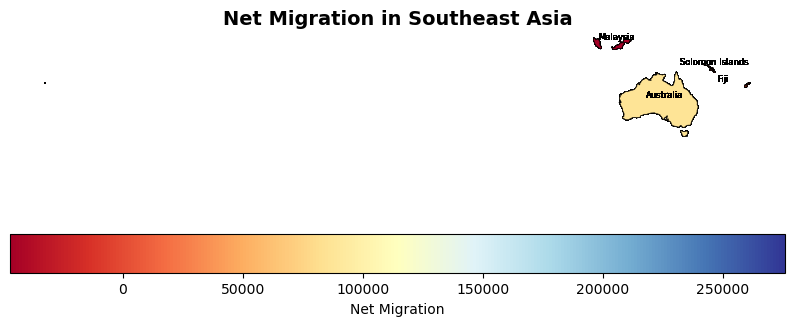

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
merged_gdf.plot(column="Net Migration", cmap="RdYlBu", linewidth=0.5, edgecolor="black",
                         legend=True, legend_kwds={"label": "Net Migration", "orientation": "horizontal"}, ax=ax)

ax.set_axis_off()
ax.set_title("Net Migration in Southeast Asia", fontsize=14, fontweight="bold")

# Annotate country names
for idx, row in merged_gdf.iterrows():
    country_name = row["SOVEREIGNT"]
    if isinstance(country_name, str) and not pd.isna(row["Net Migration"]):
        ax.annotate(
            text=country_name,
            xy=(row.geometry.centroid.x, row.geometry.centroid.y),
            xytext=(3, 3),
            textcoords="offset points",
            fontsize=6,
            ha='center'
        )

plt.show()
